In [109]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import statsmodels.formula.api as smf

In [110]:
Path.cwd()

PosixPath('/home/mrosinski/git/python-data-visualization/code/clean')

In [111]:
src_file = Path.home() / 'git' / 'python-data-visualization' / 'code' / 'data' / 'raw' / 'EPA_fuel_economy.csv'
img_dir = Path.home() / 'git' / 'python-data-visualization' / 'code' / 'images'

In [112]:
src_file

PosixPath('/home/mrosinski/git/python-data-visualization/code/data/raw/EPA_fuel_economy.csv')

In [113]:
df = pd.read_csv(src_file)

In [114]:
df.head()

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
0,Acura,NSX,2000,6.0,Automatic 4-spd,3.0,Two Seaters,-1,18.311667,2600,Premium,22,15,18
1,Acura,NSX,2000,6.0,Manual 6-spd,3.2,Two Seaters,-1,18.311667,2600,Premium,22,15,18
2,BMW,M Coupe,2000,6.0,Manual 5-spd,3.2,Two Seaters,-1,17.347895,2500,Premium,23,17,19
3,BMW,Z3 Coupe,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
4,BMW,Z3 Coupe,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24210 entries, 0 to 24209
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        24210 non-null  object 
 1   model       24210 non-null  object 
 2   year        24210 non-null  int64  
 3   cylinders   23979 non-null  float64
 4   trany       24201 non-null  object 
 5   displ       23980 non-null  float64
 6   VClass      24210 non-null  object 
 7   co2         24210 non-null  int64  
 8   barrels08   24210 non-null  float64
 9   fuelCost08  24210 non-null  int64  
 10  fuelType    24210 non-null  object 
 11  highway08   24210 non-null  int64  
 12  city08      24210 non-null  int64  
 13  comb08      24210 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 2.6+ MB


In [116]:
%matplotlib inline

# State based interface

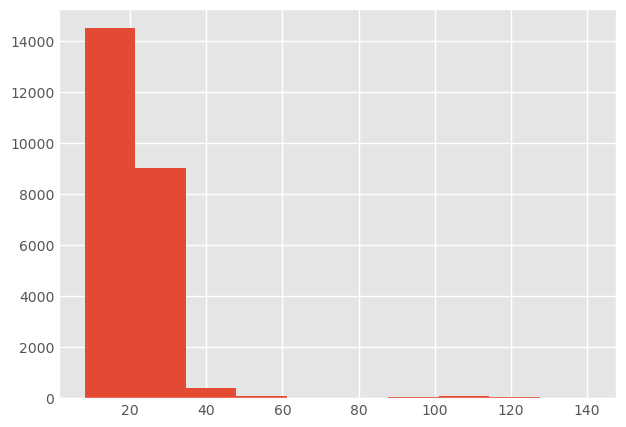

In [117]:
plt.hist(df['comb08']);

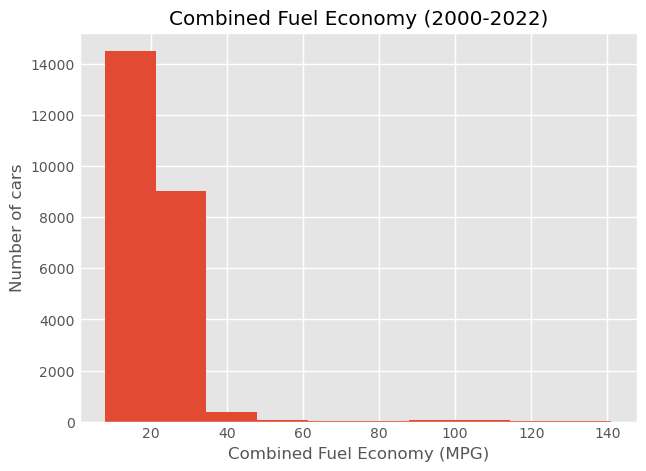

In [118]:
plt.hist(df['comb08'])
plt.xlabel('Combined Fuel Economy (MPG)')
plt.ylabel('Number of cars')
plt.title('Combined Fuel Economy (2000-2022)')
plt.show()


# Object Orientated API

In [119]:
# %matplotlib widget

Text(0.5, 1.0, 'Combined Fuel Economy (2000-2022)')

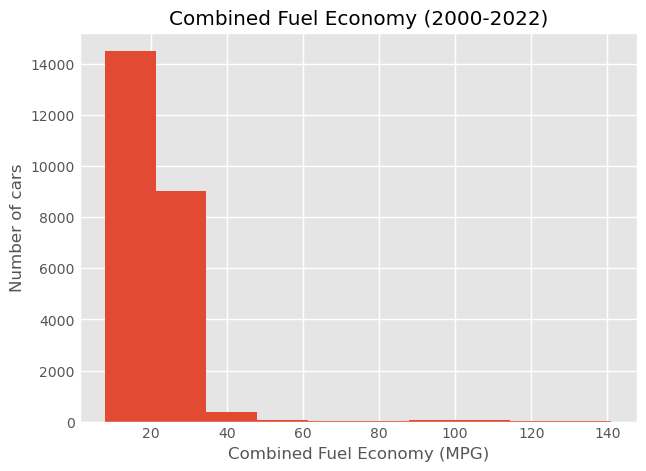

In [120]:
# object orientated approach
# most ability to interact with other libraries
fig, ax = plt.subplots()
ax.hist(df['comb08'])
ax.set_xlabel('Combined Fuel Economy (MPG)')
ax.set_ylabel('Number of cars')
ax.set_title('Combined Fuel Economy (2000-2022)')
# Turn off if not using widget
# fig.show()

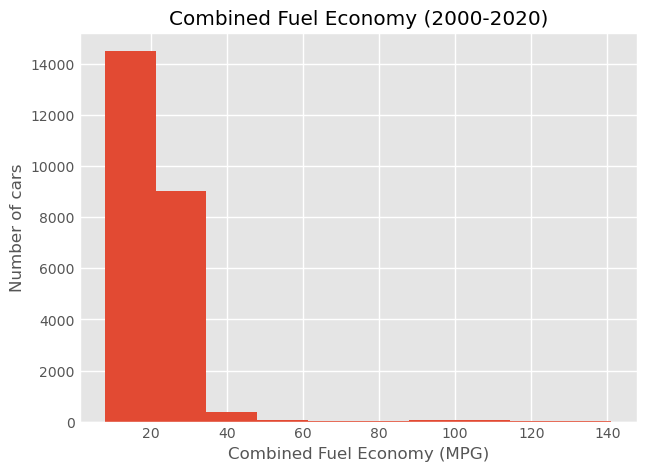

In [121]:
fig, ax = plt.subplots()
ax.hist(df['comb08'])
ax.set(xlabel='Combined Fuel Economy (MPG)',
       ylabel='Number of cars',
       title='Combined Fuel Economy (2000-2020)');

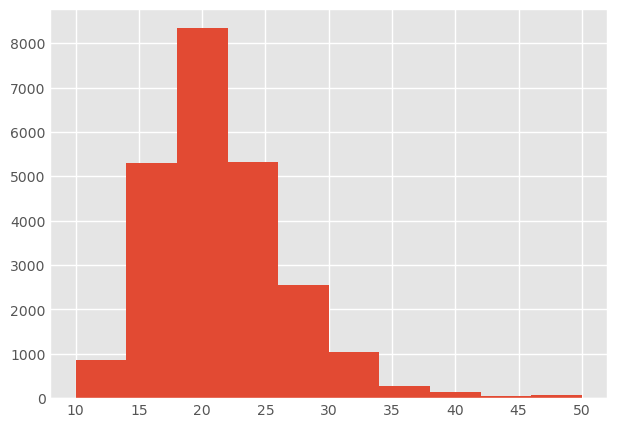

In [122]:
fig, ax = plt.subplots()
ax.hist(df['comb08'], range=(10,50));

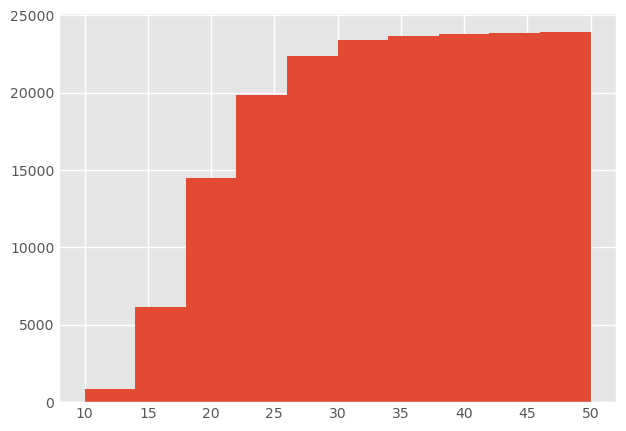

In [123]:
fig, ax = plt.subplots()
ax.hist(df['comb08'], range=(10,50), cumulative=True);

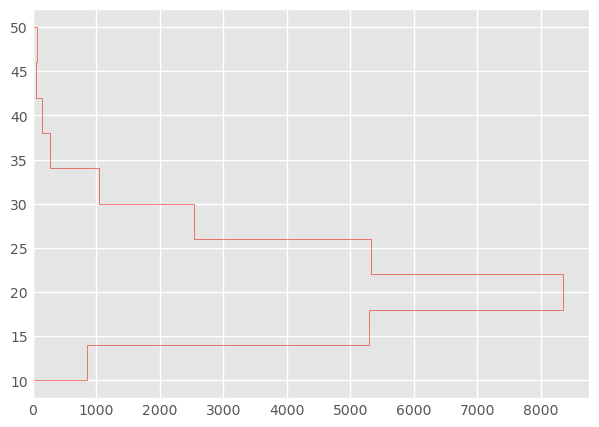

In [124]:
fig, ax = plt.subplots()
ax.hist(df['comb08'], range=(10,50), histtype='step', orientation='horizontal');

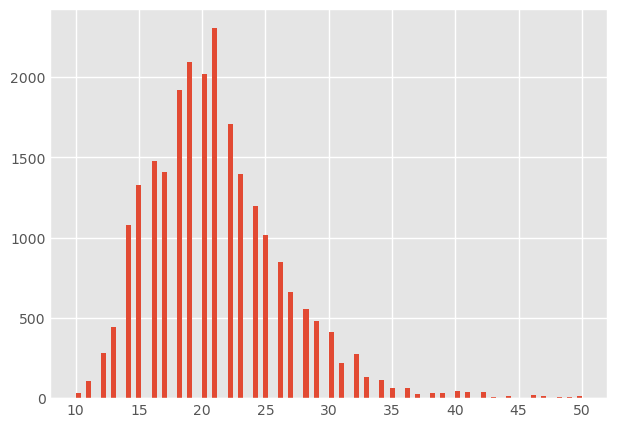

In [125]:
fig, ax = plt.subplots()
ax.hist(df['comb08'], range=(10,50), bins=100);

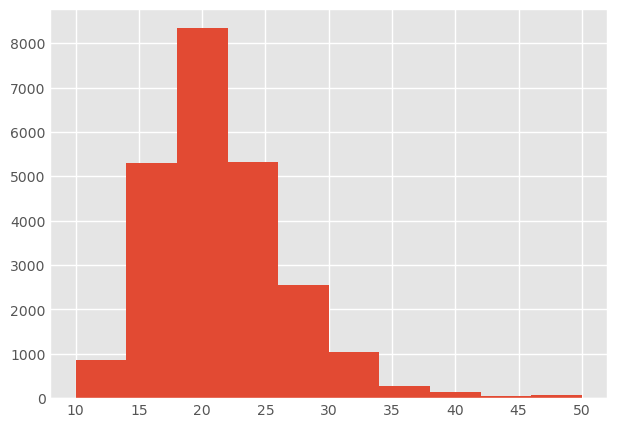

In [126]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df['comb08'], range=(10,50));

In [127]:
len(n)

10

In [128]:
bins

array([10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.])

In [129]:
patches

<BarContainer object of 10 artists>

# Working with Figures and Axes

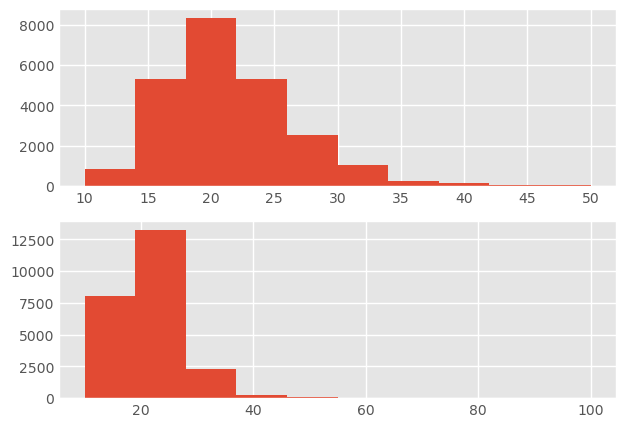

In [130]:
fig, ax = plt.subplots(2)
ax[0].hist(df['comb08'], range=(10,50))
ax[1].hist(df['comb08'], range=(10,100));

In [131]:
type(ax)

numpy.ndarray

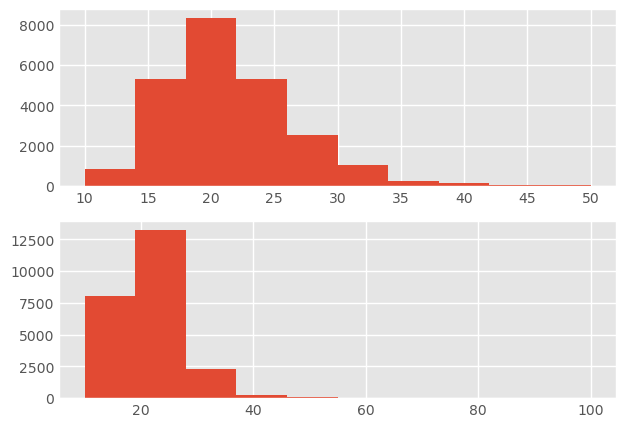

In [132]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(df['comb08'], range=(10,50))
ax2.hist(df['comb08'], range=(10,100));

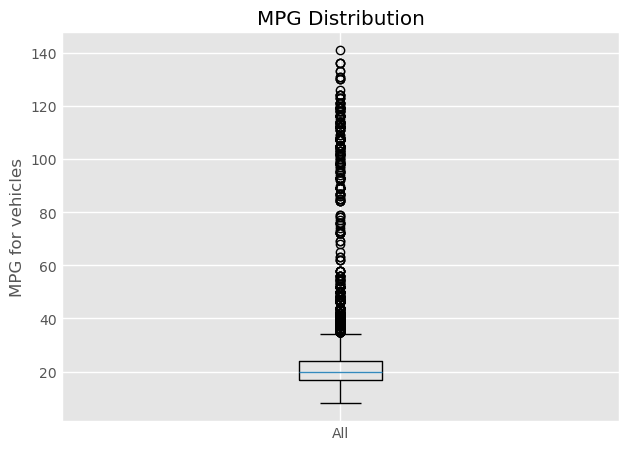

In [133]:
fig, ax = plt.subplots()
ax.boxplot(df['comb08'], labels=['All'])
ax.set(title='MPG Distribution', ylabel='MPG for vehicles');

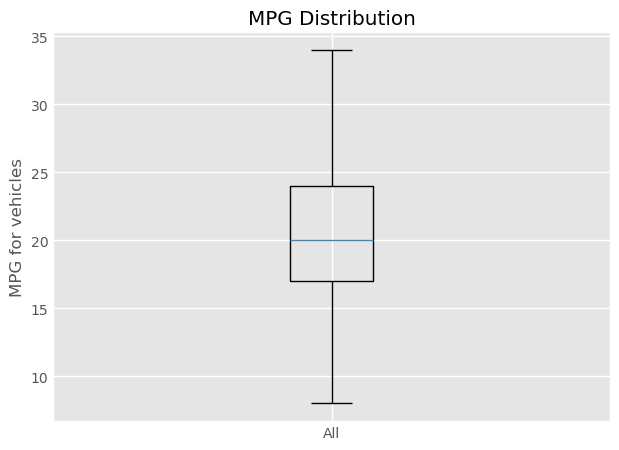

In [134]:
fig, ax = plt.subplots()
ax.boxplot(df['comb08'], labels=['All'], showfliers=False)
ax.set(title='MPG Distribution', ylabel='MPG for vehicles');

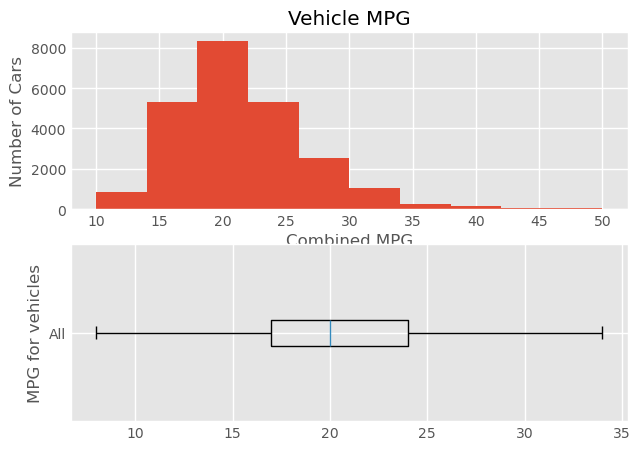

In [135]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(df['comb08'], range=(10,50))
ax1.set(title='Vehicle MPG', xlabel='Combined MPG', ylabel='Number of Cars')
ax2.boxplot(df['comb08'], labels=['All'], vert=False, showfliers=False)
ax2.set( ylabel='MPG for vehicles');

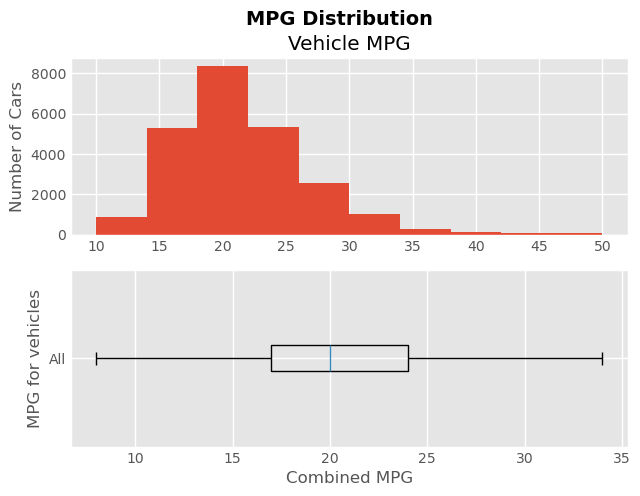

In [136]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(df['comb08'], range=(10,50))
ax1.set(title='Vehicle MPG', ylabel='Number of Cars')

ax2.boxplot(df['comb08'], labels=['All'], vert=False, showfliers=False)
ax2.set(ylabel='MPG for vehicles',  xlabel='Combined MPG')

fig.suptitle('MPG Distribution', fontsize=14, fontweight='bold');

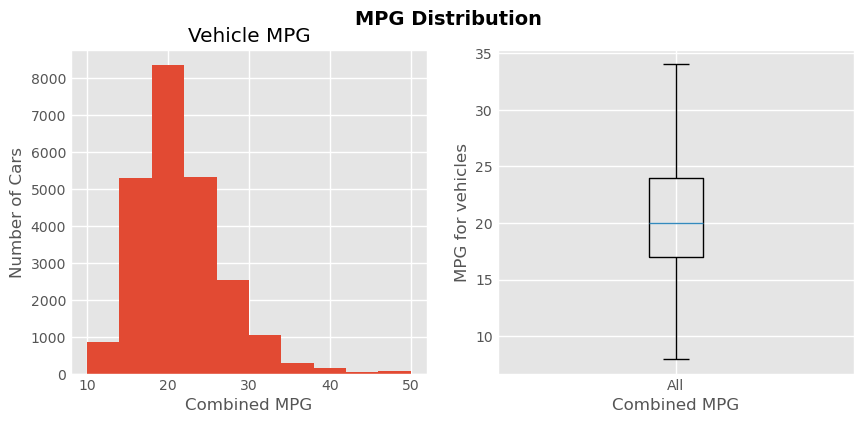

In [137]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
ax1.hist(df['comb08'], range=(10,50))
ax1.set(title='Vehicle MPG', xlabel='Combined MPG', ylabel='Number of Cars')

ax2.boxplot(df['comb08'], labels=['All'], showfliers=False)
ax2.set(ylabel='MPG for vehicles',  xlabel='Combined MPG')

fig.suptitle('MPG Distribution', fontsize=14, fontweight='bold');

# Saving images

In [138]:
fig.savefig(img_dir/'mpg_distribution.png', transparent=True, dpi=80, bbox_inches='tight')

In [139]:
fig.savefig(img_dir/'mpg_distribution.svg', transparent=False, dpi=200, bbox_inches='tight')

In [140]:
fig.savefig(img_dir/'mpg_distribution.jpg', transparent=False, dpi=200, bbox_inches='tight')

In [141]:
fig.savefig(img_dir/'mpg_distribution.pdf', transparent=False, dpi=200, bbox_inches='tight')

In [142]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

# Plot types

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24210 entries, 0 to 24209
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        24210 non-null  object 
 1   model       24210 non-null  object 
 2   year        24210 non-null  int64  
 3   cylinders   23979 non-null  float64
 4   trany       24201 non-null  object 
 5   displ       23980 non-null  float64
 6   VClass      24210 non-null  object 
 7   co2         24210 non-null  int64  
 8   barrels08   24210 non-null  float64
 9   fuelCost08  24210 non-null  int64  
 10  fuelType    24210 non-null  object 
 11  highway08   24210 non-null  int64  
 12  city08      24210 non-null  int64  
 13  comb08      24210 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 2.6+ MB


In [144]:
avg_by_year = df.groupby(['year'], as_index=False).agg({'comb08': 'mean'}).round(2)
avg_by_year

,year,comb08
0,2000,19.53
1,2001,19.48
2,2002,19.17
3,2003,19.00
4,2004,19.07
5,2005,19.19
6,2006,18.96
7,2007,18.98
8,2008,19.28
9,2009,19.74


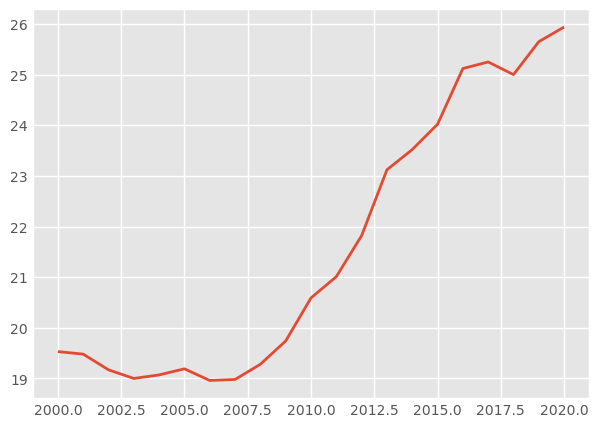

In [145]:
fig, ax1 = plt.subplots()
ax1.plot(avg_by_year['year'], avg_by_year['comb08']);

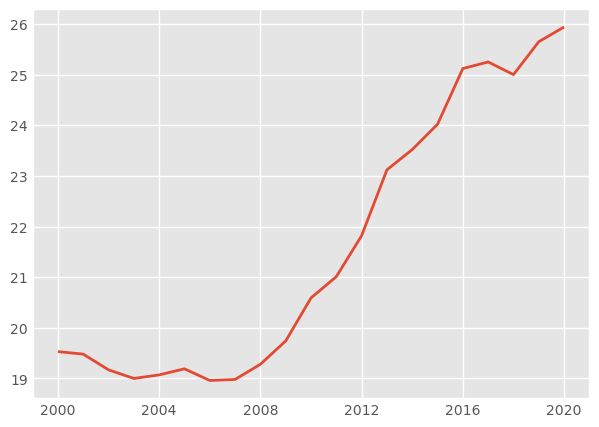

In [146]:
fig, ax1 = plt.subplots()
ax1.plot(avg_by_year['year'], avg_by_year['comb08'])
ax1.set_xticks(np.arange(2000, 2024, 4));

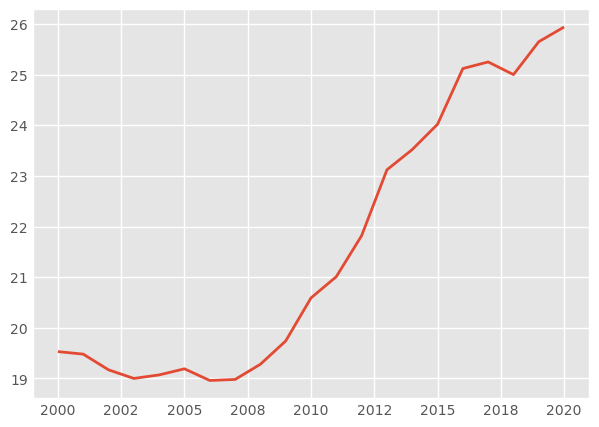

In [147]:
fig, ax1 = plt.subplots()
ax1.plot(avg_by_year['year'], avg_by_year['comb08'])
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:0.0f}"));

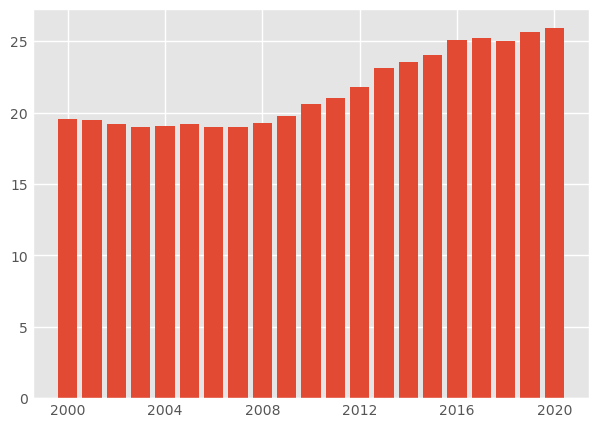

In [148]:
fig, ax1 = plt.subplots()
ax1.bar(avg_by_year['year'], avg_by_year['comb08'])
ax1.set_xticks(np.arange(2000, 2024, 4));

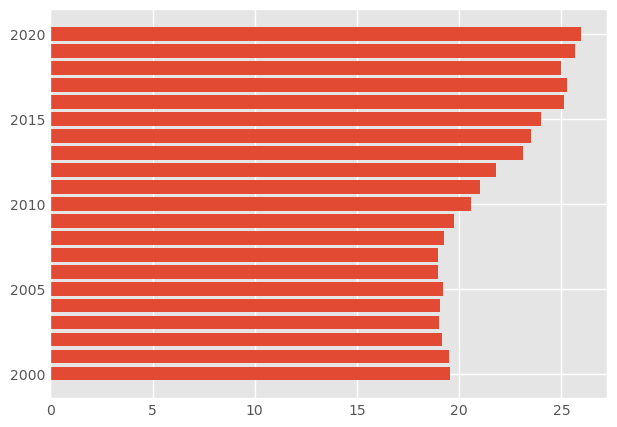

In [149]:
fig, ax1 = plt.subplots()
ax1.barh(avg_by_year['year'], avg_by_year['comb08']);

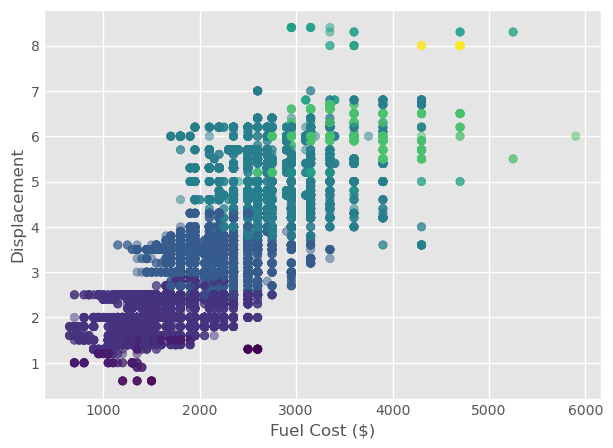

In [150]:
fig, ax1 = plt.subplots()
ax1.scatter(x = df['fuelCost08'], y = df['displ'], alpha = 0.5, c = df['cylinders'])
ax1.set(xlabel = 'Fuel Cost ($)', ylabel = 'Displacement');

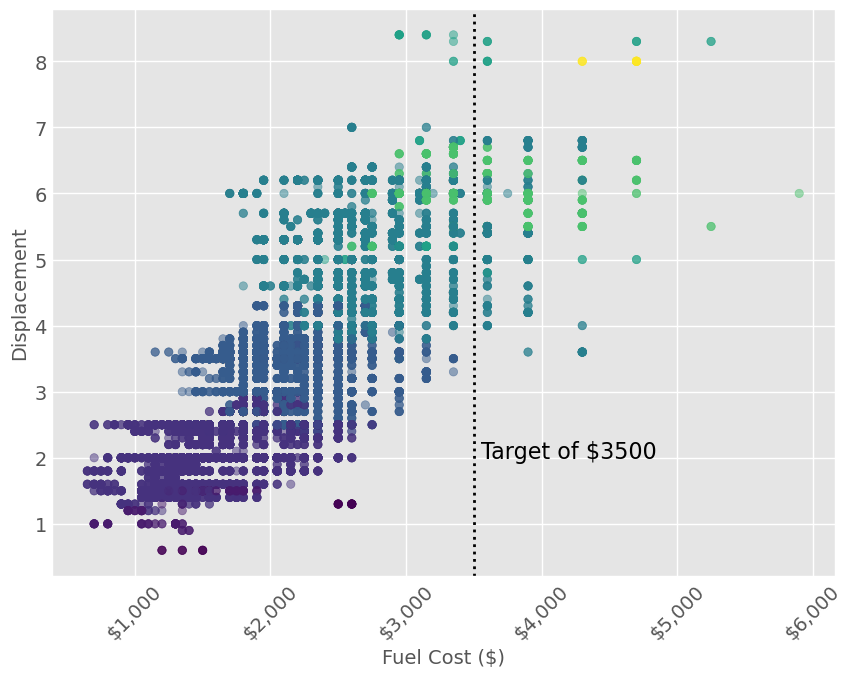

In [151]:
fig, ax1 = plt.subplots(figsize=(9,7))
ax1.scatter(x = df['fuelCost08'], y = df['displ'], alpha = 0.5, c = df['cylinders'])
ax1.set_xlabel('Fuel Cost ($)', size = 14)
ax1.set_ylabel('Displacement', size = 14)
ax1.xaxis.set_major_formatter('${x:,.0f}')
ax1.tick_params(axis='x', labelrotation=45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.axvline(3500, color='black', linestyle=':')
ax1.annotate('Target of $3500', xy = (3550,2), size=16)
ax1.grid(True);


# Plot styles

In [152]:
plt.style.available[0::2]

['Solarize_Light2',
 '_mpl-gallery',
 'bmh',
 'dark_background',
 'fivethirtyeight',
 'grayscale',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-whitegrid']

In [153]:
plt.style.use('ggplot')

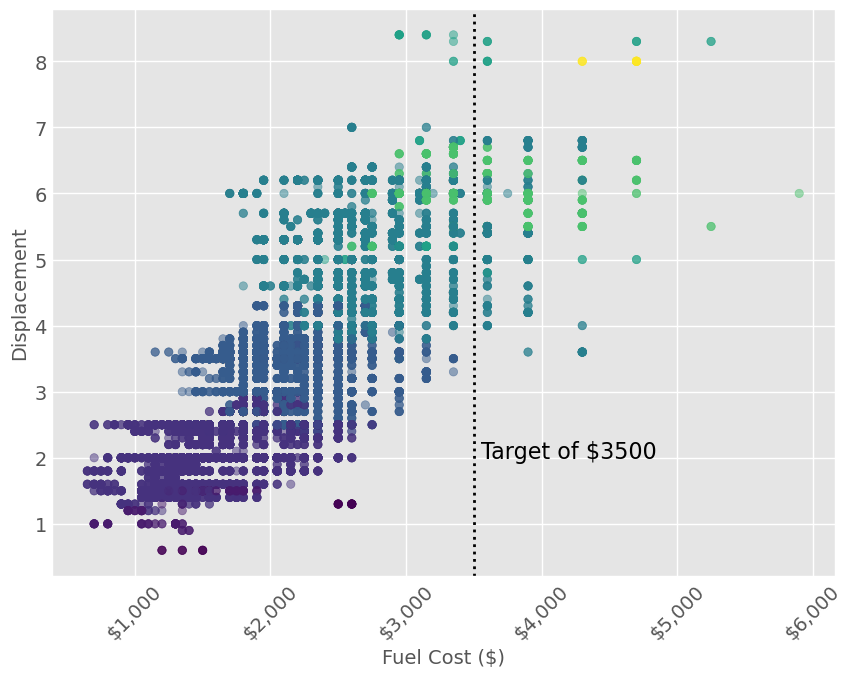

In [154]:
fig, ax1 = plt.subplots(figsize=(9,7))
ax1.scatter(x = df['fuelCost08'], y = df['displ'], alpha = 0.5, c = df['cylinders'])
ax1.set_xlabel('Fuel Cost ($)', size = 14)
ax1.set_ylabel('Displacement', size = 14)
ax1.xaxis.set_major_formatter('${x:,.0f}')
ax1.tick_params(axis='x', labelrotation=45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.axvline(3500, color='black', linestyle=':')
ax1.annotate('Target of $3500', xy = (3550,2), size=16)
ax1.grid(True);

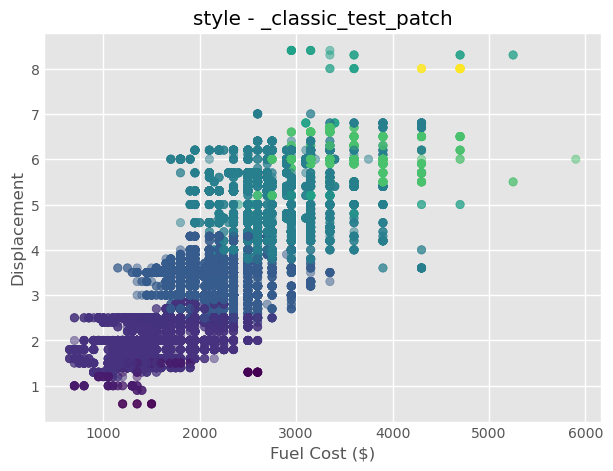

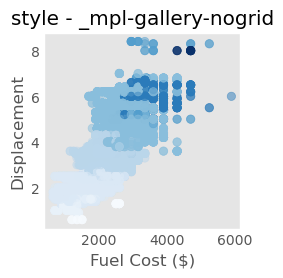

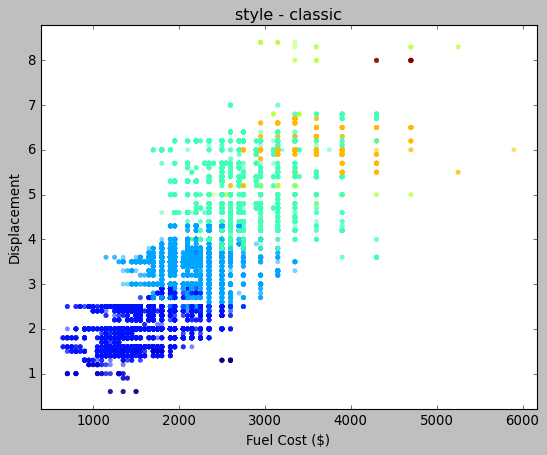

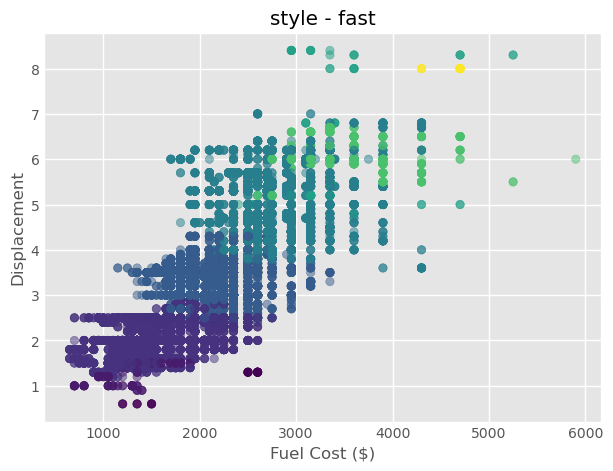

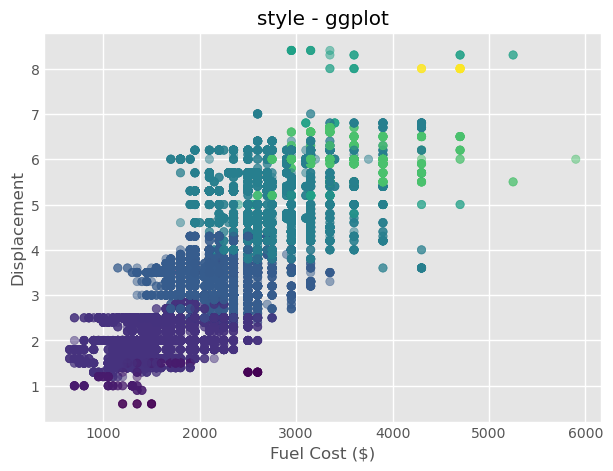

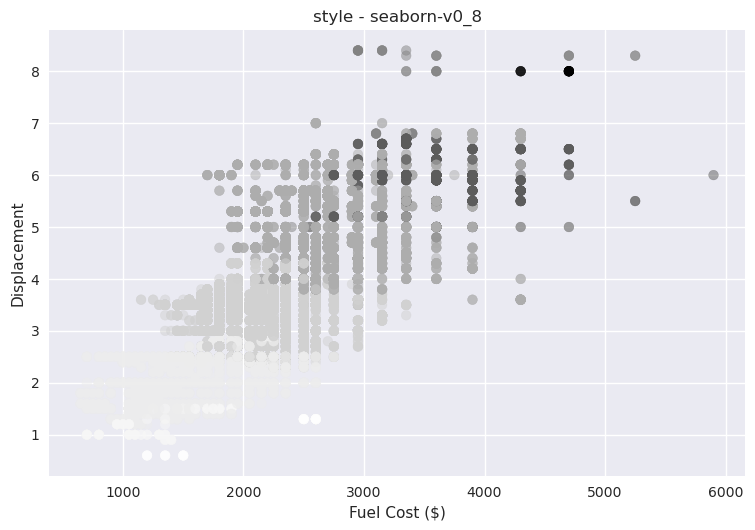

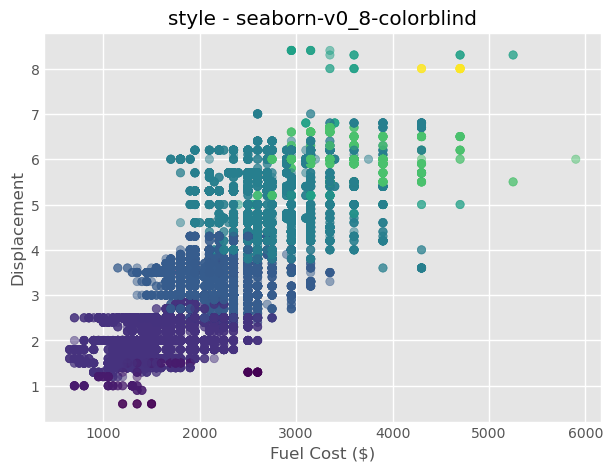

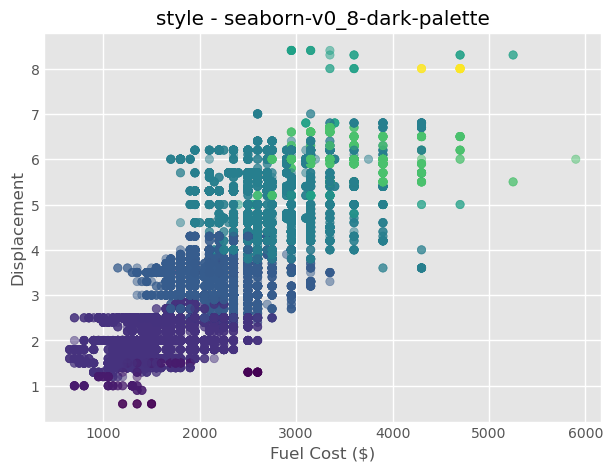

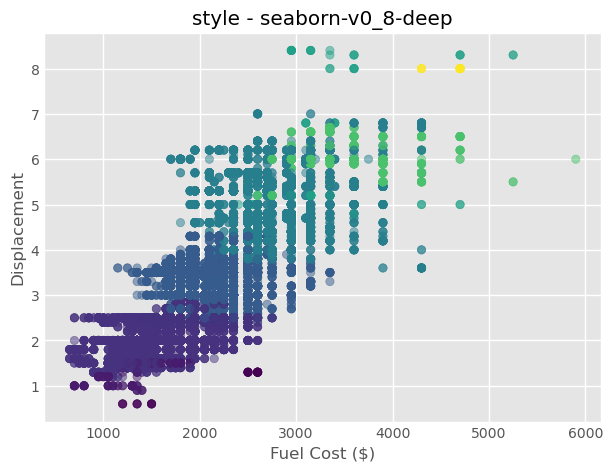

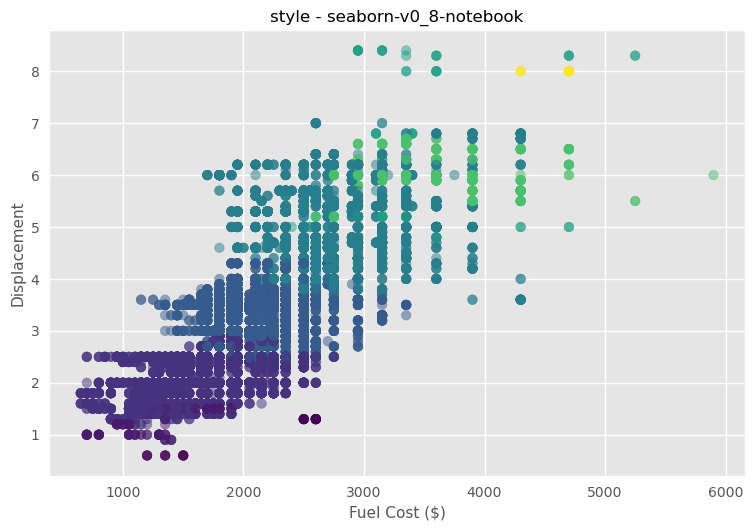

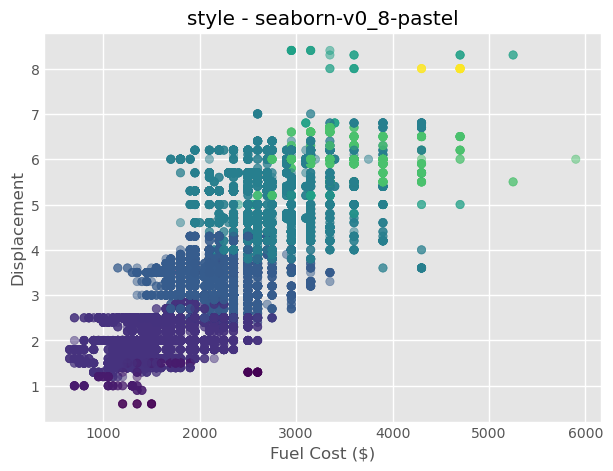

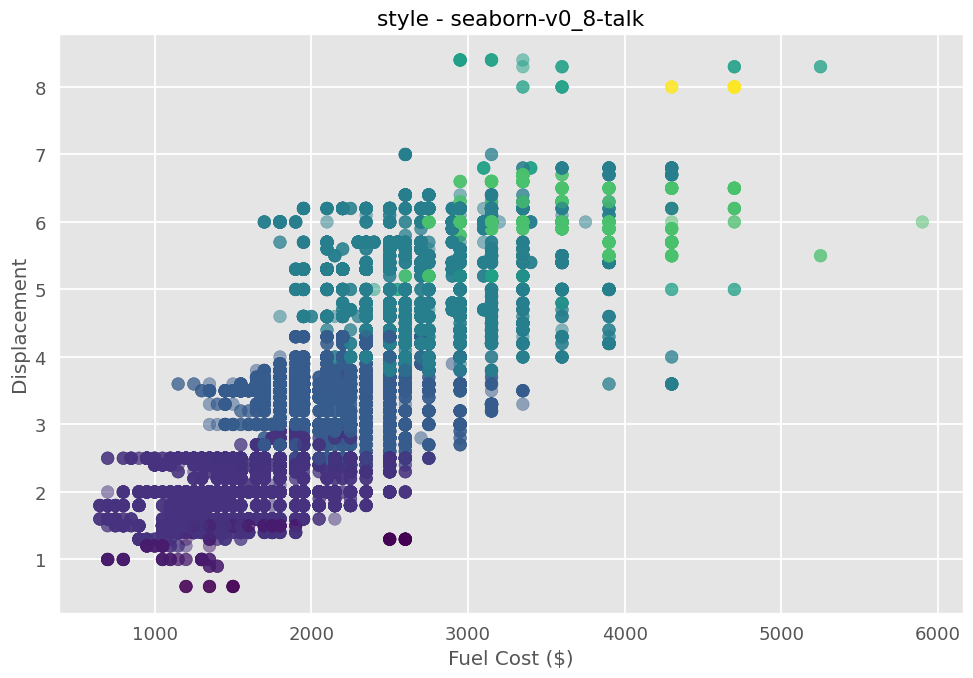

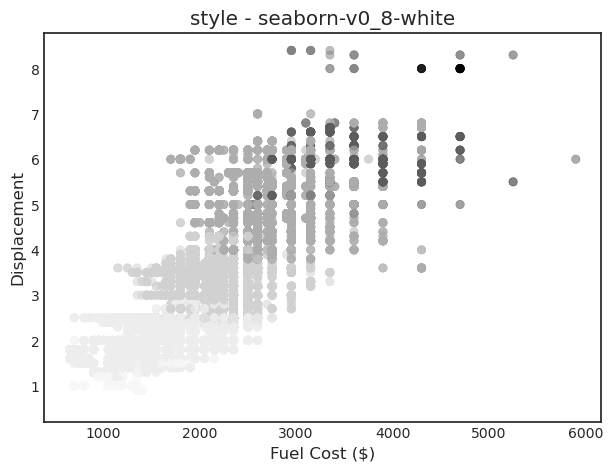

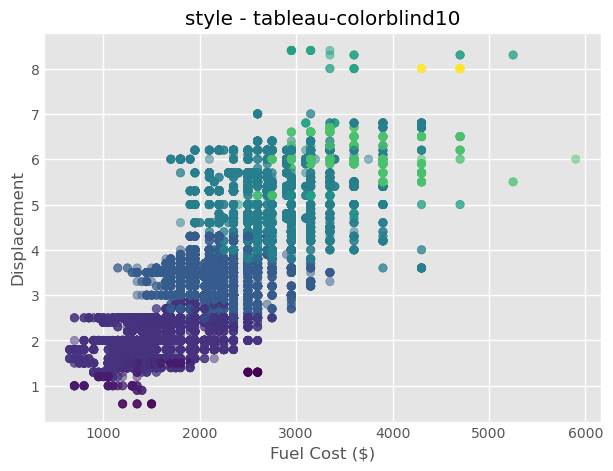

In [155]:
for style in plt.style.available[1::2]:
    with plt.style.context(style):
        fig, ax1 = plt.subplots()
        ax1.scatter(x = df['fuelCost08'], y = df['displ'], alpha = 0.5, c = df['cylinders'])
        ax1.set(title = f'style - {style}', xlabel = 'Fuel Cost ($)', ylabel = 'Displacement');

# Regression

In [156]:
%matplotlib inline

In [160]:
avg_by_year = df.groupby(['year'], as_index=False).agg({'fuelCost08': 'mean'}).round(2)
avg_by_year

,year,fuelCost08
0,2000,2184.94
1,2001,2201.48
2,2002,2229.38
3,2003,2273.99
4,2004,2264.57
5,2005,2271.01
6,2006,2287.00
7,2007,2284.15
8,2008,2285.68
9,2009,2183.23


In [161]:
mpg_model = smf.ols("fuelCost08 ~ year", data=avg_by_year).fit()

In [162]:
mpg_model.fittedvalues

0     2325.850476
1     2303.716333
2     2281.582190
3     2259.448048
4     2237.313905
5     2215.179762
6     2193.045619
7     2170.911476
8     2148.777333
9     2126.643190
10    2104.509048
11    2082.374905
12    2060.240762
13    2038.106619
14    2015.972476
15    1993.838333
16    1971.704190
17    1949.570048
18    1927.435905
19    1905.301762
20    1883.167619
dtype: float64

In [164]:
mpg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             fuelCost08   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     73.69
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           5.79e-08
Time:                        08:46:04   Log-Likelihood:                -118.43
No. Observations:                  21   AIC:                             240.9
Df Residuals:                      19   BIC:                             242.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.659e+04   5182.756      8.990      0.000    3.57e+04    5.74e+04
year         -22.1341      2.578     -8.584      0.000     -27.531     -16.737
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.137
Skew:                           0.063   Prob(JB):                        0.934
Kurtosis:                       2.624   Cond. No.                     6.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

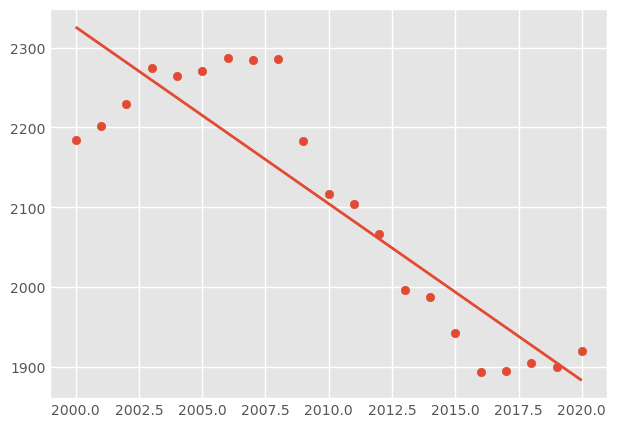

In [166]:
fig, ax = plt.subplots()
ax.scatter(avg_by_year['year'], avg_by_year['fuelCost08'])
ax.plot(avg_by_year['year'], mpg_model.fittedvalues)

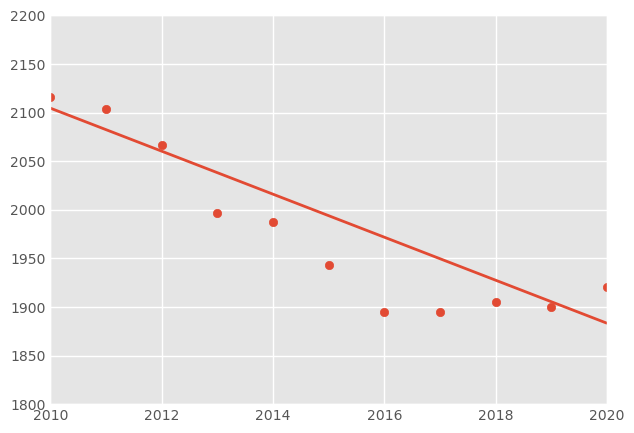

In [168]:
fig, ax = plt.subplots()
ax.scatter(avg_by_year['year'], avg_by_year['fuelCost08'])
ax.plot(avg_by_year['year'], mpg_model.fittedvalues)
ax.set_xlim(2010,2020)
ax.set_ylim(1800, 2200);

# More complex visualisation

In [174]:
df_2010 = df.query('year >= 2010').copy()
avg_fuel_cost = df_2010['fuelCost08'].mean().round(1)
avg_fuel_cost

1970.5

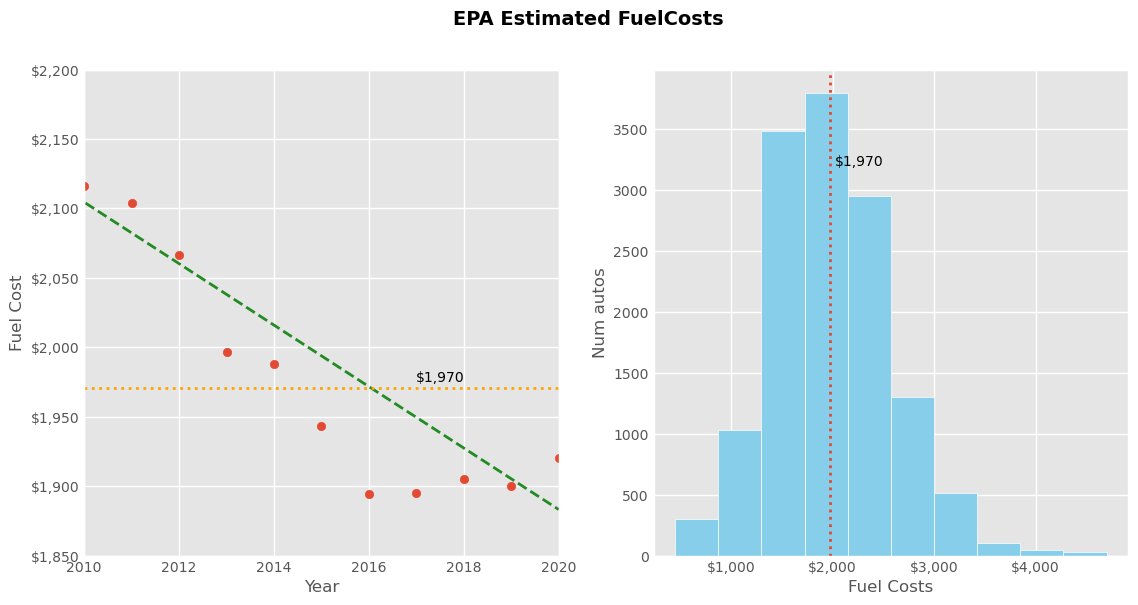

In [193]:
# Configure style and create figure
mpl.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,
                              figsize = (12,6))

# Plot scatter and line
ax1.scatter(x = avg_by_year['year'],
            y = avg_by_year['fuelCost08'])
ax1.plot(avg_by_year['year'],
         mpg_model.fittedvalues,
         color = 'forestgreen', linestyle = '--')

ax1.set(xlabel = 'Year', ylabel = 'Fuel Cost',
        ylim = (1850, 2200), xlim = (2010, 2020))
ax1.yaxis.set_major_formatter('${x:,.0f}')
ax1.axhline(avg_fuel_cost, linestyle = ':', color = 'orange')
ax1.annotate(f'${avg_fuel_cost:,.0f}', xy = (2017, avg_fuel_cost + 5))

# Plot histogram
ax2.hist(df_2010['fuelCost08'], color = 'skyblue', ec = 'white')
ax2.xaxis.set_major_formatter('${x:,.0f}')
ax2.set(xlabel = 'Fuel Costs', ylabel = 'Num autos')
ax2.axvline(avg_fuel_cost, linestyle = ':')
ax2.annotate(f'${avg_fuel_cost:,.0f}', xy = (avg_fuel_cost + 50, 3200))

fig.suptitle('EPA Estimated FuelCosts',
             weight = 'bold', size = 14)

# Save image
fig.savefig(img_dir/'line_hist.svg',
            transparent = False, dpi = 200, bbox_inches = 'tight')
